In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
datapath = "./dataset"
images = []
class_list = []
label_class = ["Boot", "Sandal", "Shoe"]

In [ ]:
for i, label in enumerate(label_class):
    img_dir = os.path.join(datapath, label)
    #img_dir = ./dataset/Boot, ./dataset/Sandal, ./dataset/Shoe, 
    for j, img in enumerate(os.listdir(img_dir)):
        img_path = os.path.join(img_dir, img)
        #./dataset/Boot/Boot(1).jpg
        image = load_img(img_path)
        image = img_to_array(image)
        image = tf.image.rgb_to_grayscale(image)
        #0-255 -> 0-1
        image = image/255.0
        images.append(image)
        class_list.append(i)
        if j > 1000:
            break


In [ ]:
images[0].shape

TensorShape([102, 136, 1])

In [ ]:
y = tf.keras.utils.to_categorical(class_list, num_classes=len(label_class))
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], shape=(3006, 3))

In [ ]:
images = np.asarray(images)

In [ ]:
#images: t -> train : temp -> 80:20
x_train, x_temp, y_train, y_temp  = train_test_split(images, y, train_size=0.8, random_state=27)

#x_temp: y_temp = test: : validation -> 10:10
x_val, x_test, y_val, y_test  = train_test_split(images, y, train_size=0.5, random_state=27)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", strides=(1, 1), activation="relu", input_shape = (102, 136, 1)), #input shape ikutin ukuran gambar, strides 1, 3 aktinya geser ke kiri 1 pixel, pas udah mentok turunnya 3 pizel
    tf.keras.layers.MaxPooling2D((2, 2)), #artinya ukuran gambarnya dibagi 2 _. 51, 68, 16 -> yang 16 outputnya dari 1 ke 16
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", strides=(1, 1), activation="relu"), 
    tf.keras.layers.MaxPooling2D((2, 2)), #kenapa bikinnya ganti"an, kita mau extract informasinya pake conv, baru dicompress sama maxpooling -> 25, 34, 32
    tf.keras.layers.Flatten(), #ngecompress semuanya jadi 1 dimensi #25, 34, 32 -> 27200, 1 (dikali semua)
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax") # 3nya represent 3 kategori (boo, sandal sama shoe)
    #output softmax = [probaility A, prob B, prob C]
])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics =["accuracy"]
)
#binary cross entropy = kategori yang cuma 2 (0/1 true/false)
#categorical cross entropy = kategori lebih dari 2, biasanya di one hot encode
#sparse categorical cross entropy = kategori lebih dari 2, tapi ga di one hot encode

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 102, 136, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 51, 68, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 68, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       870,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875,811 (3.34 MB)

 Trainable params: 875,811 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=early_stop)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.7408 - loss: 0.6246 - val_accuracy: 0.8736 - val_loss: 0.3052
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9114 - loss: 0.2445 - val_accuracy: 0.9215 - val_loss: 0.2032
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9314 - loss: 0.1818 - val_accuracy: 0.9468 - val_loss: 0.1326
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9430 - loss: 0.1491 - val_accuracy: 0.9561 - val_loss: 0.1215
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9576 - loss: 0.1150 - val_accuracy: 0.9634 - val_loss: 0.1154
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9655 - loss: 0.1002 - val_accuracy: 0.9774 - val_loss: 0.0633
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9767 - loss: 0.0663 - val_accuracy: 0.9820 - val_loss: 0.0542
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9763 - loss: 0.0638 - val_accuracy: 0.9827 - v

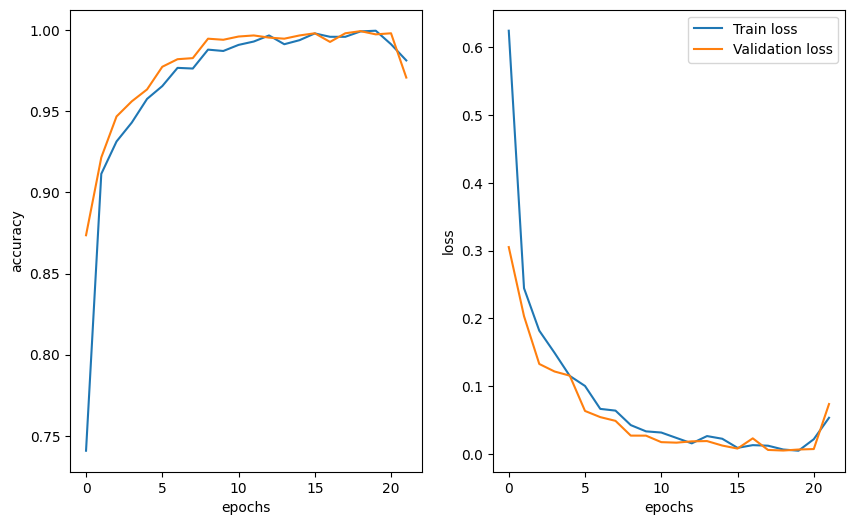

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2,1)
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2,2)
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9508 - loss: 0.1597


[0.15972857177257538, 0.9507651329040527]

In [ ]:
model.save("cnn_model.h5")

DCNN